In [ ]:
#Google Drive mounted
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive

Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
#Install and import all the required libraries
!pip install colorama
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns
import numpy as np
from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
from colorama import Fore, Back, Style

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Data Loading and Cleaning**

In [ ]:
#load the dataset
df = pd.read_csv('Dissertation/WELFake_Dataset.csv')
df.count()

Unnamed: 0    72134
title         71576
text          72095
label         72134
dtype: int64

In [ ]:
#display the top 5 rows in the dataset
df.head(5)

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [ ]:
#display the dimensions of the dataset which is in the form of csv file
df.shape

(72134, 4)

In [ ]:
#remove the unnamed serial number column which is not required
df = df.loc[:,  ~df.columns.str.contains('^Unnamed')]

In [ ]:
#Count the number of fake and real labels in the dataset
label_count = df.value_counts('label')
print(label_count)

label
1    37106
0    35028
dtype: int64


In [ ]:
#print the sum of the null values present in the dataset
print(df.isnull().sum())

title    558
text      39
label      0
dtype: int64


In [ ]:
#drop the null values 
df = df.dropna()

In [ ]:
#reconfirm the removed null values
print(df.isnull().sum())

title    0
text     0
label    0
dtype: int64


In [ ]:
#print the duplicate values in the dataset
print(df.duplicated())

0        False
2        False
3        False
4        False
5        False
         ...  
72129    False
72130    False
72131    False
72132    False
72133     True
Length: 71537, dtype: bool


In [ ]:
#display the sum of the duplicated values in the dataset
df.duplicated().sum()

8416

In [ ]:
#print the number duplicated values as well as the number of non-duplicated values
print(df.duplicated().value_counts())

False    63121
True      8416
dtype: int64


In [ ]:
#remove the duplicated values present in the dataset
df = df.drop_duplicates()

In [ ]:
#reconfirm whether the duplicated values are removed succesfully by displaying the sum of the duplicated values
df.duplicated().sum()

0

In [ ]:
#Again check the dimensions of the dataset(i.e. csv file)
df.shape

(63121, 3)

In [ ]:

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
import string as st

In [ ]:
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [ ]:
df['removed_punc'] = df['text'].apply(lambda x: remove_punct(x))
df.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                        removed_punc  
0  No comment is expected from Barack Obama Membe...  
2   Now most of the demonstrators gathered last n...  
3  A dozen politically active pastors came here f...  
4  The RS28 Sarmat missile dubbed Satan 2 will re...  
5  All we can say on this one is it s about time ...

In [ ]:
# Tokenize
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [ ]:
df['tokens'] = df['removed_punc'].apply(lambda msg : tokenize(msg))
df.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                        removed_punc  \
0  No comment is expected from Barack Obama Membe...   
2   Now most of the demonstrators gathered last n...   
3  A dozen politically active pastors came here f...   
4  The RS28 Sarmat missile dubbed Satan 2 will re...   
5  All we can say on this one is it s about time ...   

                                              tokens  
0  [no, comment, is, expected, from, barack, obam...  
2  [, now, most, of, the, demonstrators, gathered...  
3  [a, dozen, politically, active, pastors, came,...  
4  [the, rs28, sarmat, missile, dubbed, satan, 2,...  
5  [all, we, can, say, on, this, one, is, it, s, ...

In [ ]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [ ]:
df['filtered_tokens'] = df['tokens'].apply(lambda x : remove_small_words(x))
df.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                        removed_punc  \
0  No comment is expected from Barack Obama Membe...   
2   Now most of the demonstrators gathered last n...   
3  A dozen politically active pastors came here f...   
4  The RS28 Sarmat missile dubbed Satan 2 will re...   
5  All we can say on this one is it s about time ...   

                                              tokens  \
0  [no, comment, is, expected, from, barack, obam...   
2  [, now, most, of, the, demonstrators, gathered...   
3  [a, dozen, politically, active, pastors, came,...   
4  [the, rs28, sarmat, missile, dubbed, satan, 2,...   
5  [all, we, can, say, on, this, one, is, it, s, ...   

                                     filtered_tokens  
0  [comment, expected, from, barack, obama, membe...  
2  [most, demonstrators, gathered, last, night, w...  
3  [dozen, politically, active, pastors, came, he...  
4  [rs28, sarmat, missile, dubbed, satan, will, r...  
5  [this, about, time, someone, sued, southern, p...

In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['clean_tokens'] = df['filtered_tokens'].apply(lambda x : remove_stopwords(x))
df.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                        removed_punc  \
0  No comment is expected from Barack Obama Membe...   
2   Now most of the demonstrators gathered last n...   
3  A dozen politically active pastors came here f...   
4  The RS28 Sarmat missile dubbed Satan 2 will re...   
5  All we can say on this one is it s about time ...   

                                              tokens  \
0  [no, comment, is, expected, from, barack, obam...   
2  [, now, most, of, the, demonstrators, gathered...   
3  [a, dozen, politically, active, pastors, came,...   
4  [the, rs28, sarmat, missile, dubbed, satan, 2,...   
5  [all, we, can, say, on, this, one, is, it, s, ...   

                                     filtered_tokens  \
0  [comment, expected, from, barack, obama, membe...   
2  [most, demonstrators, gathered, last, night, w...   
3  [dozen, politically, active, pastors, came, he...   
4  [rs28, sarmat, missile, dubbed, satan, will, r...   
5  [this, about, time, someone, sued, southern, p...   

                                        clean_tokens  
0  [comment, expected, barack, obama, members, fy...  
2  [demonstrators, gathered, last, night, exercis...  
3  [dozen, politically, active, pastors, came, pr...  
4  [rs28, sarmat, missile, dubbed, satan, replace...  
5  [time, someone, sued, southern, poverty, cente...

In [ ]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [ ]:
df['lemma_words'] = df['clean_tokens'].apply(lambda x : lemmatize(x))
df.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                        removed_punc  \
0  No comment is expected from Barack Obama Membe...   
2   Now most of the demonstrators gathered last n...   
3  A dozen politically active pastors came here f...   
4  The RS28 Sarmat missile dubbed Satan 2 will re...   
5  All we can say on this one is it s about time ...   

                                              tokens  \
0  [no, comment, is, expected, from, barack, obam...   
2  [, now, most, of, the, demonstrators, gathered...   
3  [a, dozen, politically, active, pastors, came,...   
4  [the, rs28, sarmat, missile, dubbed, satan, 2,...   
5  [all, we, can, say, on, this, one, is, it, s, ...   

                                     filtered_tokens  \
0  [comment, expected, from, barack, obama, membe...   
2  [most, demonstrators, gathered, last, night, w...   
3  [dozen, politically, active, pastors, came, he...   
4  [rs28, sarmat, missile, dubbed, satan, will, r...   
5  [this, about, time, someone, sued, southern, p...   

                                        clean_tokens  \
0  [comment, expected, barack, obama, members, fy...   
2  [demonstrators, gathered, last, night, exercis...   
3  [dozen, politically, active, pastors, came, pr...   
4  [rs28, sarmat, missile, dubbed, satan, replace...   
5  [time, someone, sued, southern, poverty, cente...   

                                         lemma_words  
0  [comment, expected, barack, obama, member, fyf...  
2  [demonstrator, gathered, last, night, exercisi...  
3  [dozen, politically, active, pastor, came, pri...  
4  [rs28, sarmat, missile, dubbed, satan, replace...  
5  [time, someone, sued, southern, poverty, cente...

In [ ]:

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [ ]:
df['clean'] = df['lemma_words'].apply(lambda x : return_sentences(x))
df.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                        removed_punc  \
0  No comment is expected from Barack Obama Membe...   
2   Now most of the demonstrators gathered last n...   
3  A dozen politically active pastors came here f...   
4  The RS28 Sarmat missile dubbed Satan 2 will re...   
5  All we can say on this one is it s about time ...   

                                              tokens  \
0  [no, comment, is, expected, from, barack, obam...   
2  [, now, most, of, the, demonstrators, gathered...   
3  [a, dozen, politically, active, pastors, came,...   
4  [the, rs28, sarmat, missile, dubbed, satan, 2,...   
5  [all, we, can, say, on, this, one, is, it, s, ...   

                                     filtered_tokens  \
0  [comment, expected, from, barack, obama, membe...   
2  [most, demonstrators, gathered, last, night, w...   
3  [dozen, politically, active, pastors, came, he...   
4  [rs28, sarmat, missile, dubbed, satan, will, r...   
5  [this, about, time, someone, sued, southern, p...   

                                        clean_tokens  \
0  [comment, expected, barack, obama, members, fy...   
2  [demonstrators, gathered, last, night, exercis...   
3  [dozen, politically, active, pastors, came, pr...   
4  [rs28, sarmat, missile, dubbed, satan, replace...   
5  [time, someone, sued, southern, poverty, cente...   

                                         lemma_words  \
0  [comment, expected, barack, obama, member, fyf...   
2  [demonstrator, gathered, last, night, exercisi...   
3  [dozen, politically, active, pastor, came, pri...   
4  [rs28, sarmat, missile, dubbed, satan, replace...   
5  [time, someone, sued, southern, poverty, cente...   

                                               clean  
0  comment expected barack obama member fyf911 fu...  
2  demonstrator gathered last night exercising co...  
3  dozen politically active pastor came private d...  
4  rs28 sarmat missile dubbed satan replace ss18 ...  
5  time someone sued southern poverty centeron tu...

In [ ]:
# Display the dataframe
df

title  \
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3      Bobby Jindal, raised Hindu, uses story of Chri...   
4      SATAN 2: Russia unvelis an image of its terrif...   
5      About Time! Christian Group Sues Amazon and SP...   
...                                                  ...   
72127  WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...   
72129  Russians steal research on Trump in hack of U....   
72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  Trump tussle gives unpopular Mexican leader mu...   

                                                    text  label  \
0      No comment is expected from Barack Obama Membe...      1   
2       Now, most of the demonstrators gathered last ...      1   
3      A dozen politically active pastors came here f...      0   
4      The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5      All we can say on this one is it s about time ...      1   
...                                                  ...    ...   
72127  An email released by WikiLeaks on Sunday appea...      1   
72129  WASHINGTON (Reuters) - Hackers believed to be ...      0   
72130  You know, because in fantasyland Republicans n...      1   
72131  Migrants Refuse To Leave Train At Refugee Camp...      0   
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...      0   

                                            removed_punc  \
0      No comment is expected from Barack Obama Membe...   
2       Now most of the demonstrators gathered last n...   
3      A dozen politically active pastors came here f...   
4      The RS28 Sarmat missile dubbed Satan 2 will re...   
5      All we can say on this one is it s about time ...   
...                                                  ...   
72127  An email released by WikiLeaks on Sunday appea...   
72129  WASHINGTON Reuters  Hackers believed to be wor...   
72130  You know because in fantasyland Republicans ne...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  MEXICO CITY Reuters  Donald Trump’s combative ...   

                                                  tokens  \
0      [no, comment, is, expected, from, barack, obam...   
2      [, now, most, of, the, demonstrators, gathered...   
3      [a, dozen, politically, active, pastors, came,...   
4      [the, rs28, sarmat, missile, dubbed, satan, 2,...   
5      [all, we, can, say, on, this, one, is, it, s, ...   
...                                                  ...   
72127  [an, email, released, by, wikileaks, on, sunda...   
72129  [washington, reuters, hackers, believed, to, b...   
72130  [you, know, because, in, fantasyland, republic...   
72131  [migrants, refuse, to, leave, train, at, refug...   
72132  [mexico, city, reuters, donald, trump’s, comba...   

                                         filtered_tokens  \
0      [comment, expected, from, barack, obama, membe...   
2      [most, demonstrators, gathered, last, night, w...   
3      [dozen, politically, active, pastors, came, he...   
4      [rs28, sarmat, missile, dubbed, satan, will, r...   
5      [this, about, time, someone, sued, southern, p...   
...                                                  ...   
72127  [email, released, wikileaks, sunday, appears, ...   
72129  [washington, reuters, hackers, believed, worki...   
72130  [know, because, fantasyland, republicans, neve...   
72131  [migrants, refuse, leave, train, refugee, camp...   
72132  [mexico, city, reuters, donald, trump’s, comba...   

                                            clean_tokens  \
0      [comment, expected, barack, obama, members, fy...   
2      [demonstrators, gathered, last, night, exercis...   
3      [dozen, politically, active, pastors, came, pr...   
4      [rs28, sarmat, missile, dubbed, satan, replace...   
5      [time, someone, sued, southern, poverty, cente...   
..

In [ ]:
#remove the unnamed serial number column which is not required
df = df.loc[:,  ~df.columns.str.contains('^removed_punc')]

In [ ]:
#remove the unnamed serial number column which is not required
df = df.loc[:,  ~df.columns.str.contains('^tokens')]

In [ ]:
df = df.loc[:,  ~df.columns.str.contains('^filtered_tokens')]

In [ ]:
df = df.loc[:,  ~df.columns.str.contains('^clean_tokens')]

In [ ]:
df = df.loc[:,  ~df.columns.str.contains('^clean_text')]

In [ ]:
df

title  \
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3      Bobby Jindal, raised Hindu, uses story of Chri...   
4      SATAN 2: Russia unvelis an image of its terrif...   
5      About Time! Christian Group Sues Amazon and SP...   
...                                                  ...   
72127  WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...   
72129  Russians steal research on Trump in hack of U....   
72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  Trump tussle gives unpopular Mexican leader mu...   

                                                    text  label  \
0      No comment is expected from Barack Obama Membe...      1   
2       Now, most of the demonstrators gathered last ...      1   
3      A dozen politically active pastors came here f...      0   
4      The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5      All we can say on this one is it s about time ...      1   
...                                                  ...    ...   
72127  An email released by WikiLeaks on Sunday appea...      1   
72129  WASHINGTON (Reuters) - Hackers believed to be ...      0   
72130  You know, because in fantasyland Republicans n...      1   
72131  Migrants Refuse To Leave Train At Refugee Camp...      0   
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...      0   

                                             lemma_words  \
0      [comment, expected, barack, obama, member, fyf...   
2      [demonstrator, gathered, last, night, exercisi...   
3      [dozen, politically, active, pastor, came, pri...   
4      [rs28, sarmat, missile, dubbed, satan, replace...   
5      [time, someone, sued, southern, poverty, cente...   
...                                                  ...   
72127  [email, released, wikileaks, sunday, appears, ...   
72129  [washington, reuters, hacker, believed, workin...   
72130  [know, fantasyland, republican, never, questio...   
72131  [migrant, refuse, leave, train, refugee, camp,...   
72132  [mexico, city, reuters, donald, trump’s, comba...   

                                                   clean  
0      comment expected barack obama member fyf911 fu...  
2      demonstrator gathered last night exercising co...  
3      dozen politically active pastor came private d...  
4      rs28 sarmat missile dubbed satan replace ss18 ...  
5      time someone sued southern poverty centeron tu...  
...                                                  ...  
72127  email released wikileaks sunday appears show f...  
72129  washington reuters hacker believed working rus...  
72130  know fantasyland republican never questioned c...  
72131  migrant refuse leave train refugee camp hungar...  
72132  mexico city reuters donald trump’s combative s...  

[63121 rows x 5 columns]

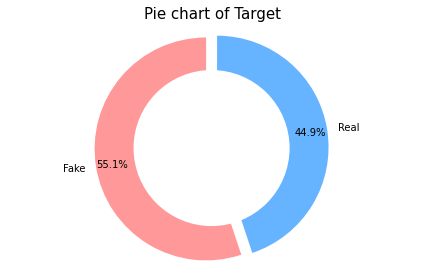

In [ ]:
#Displaying pie chart of the Real and Fake news along with the percentage.
labels = [ 'Fake','Real']
values = df['label'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()

plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
ax1.set_title("Pie chart of Target", 
              fontdict = {'fontsize' : 15,
                          'fontweight' : 10},
              loc = 'center')
plt.tight_layout()
plt.show()

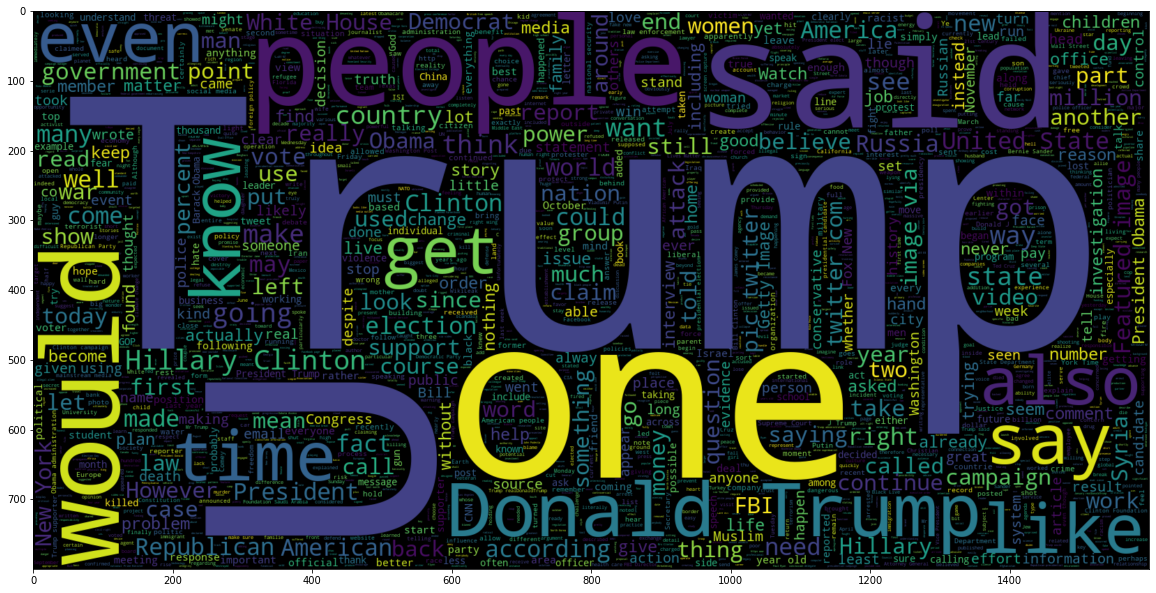

In [ ]:
# Creating a word cloudwith 2000 words for the news that is real using the uncleaned data
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 1].text))
plt.imshow(wc, interpolation = 'bilinear')

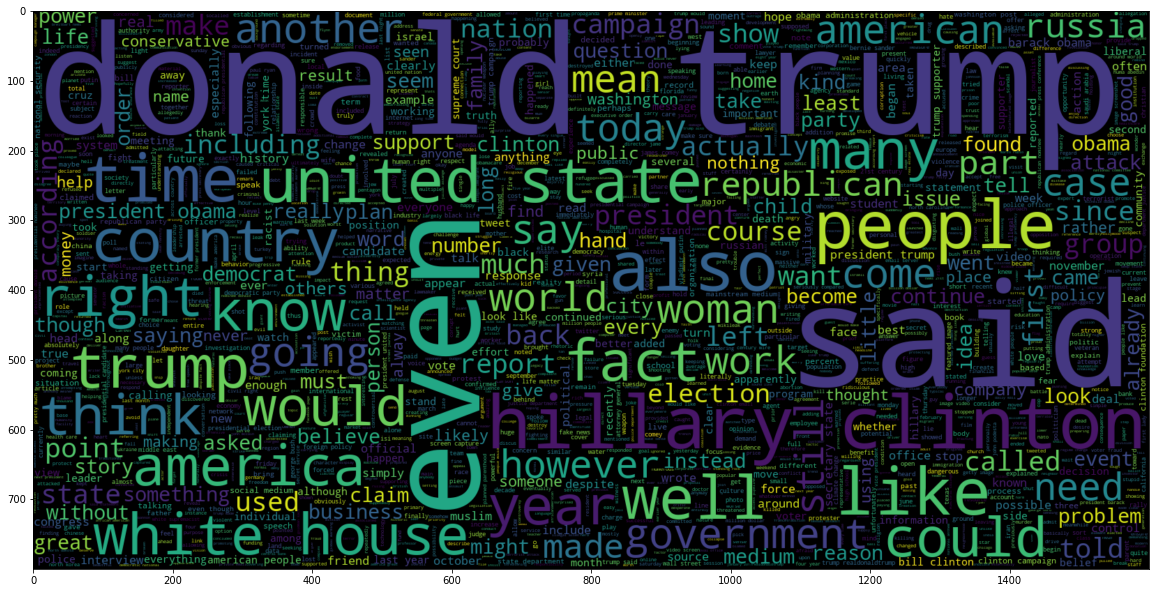

In [ ]:
# Creating a word cloud using 2000 words for text that is real using the cleaned version of the data
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 1].clean))
plt.imshow(wc, interpolation = 'bilinear')

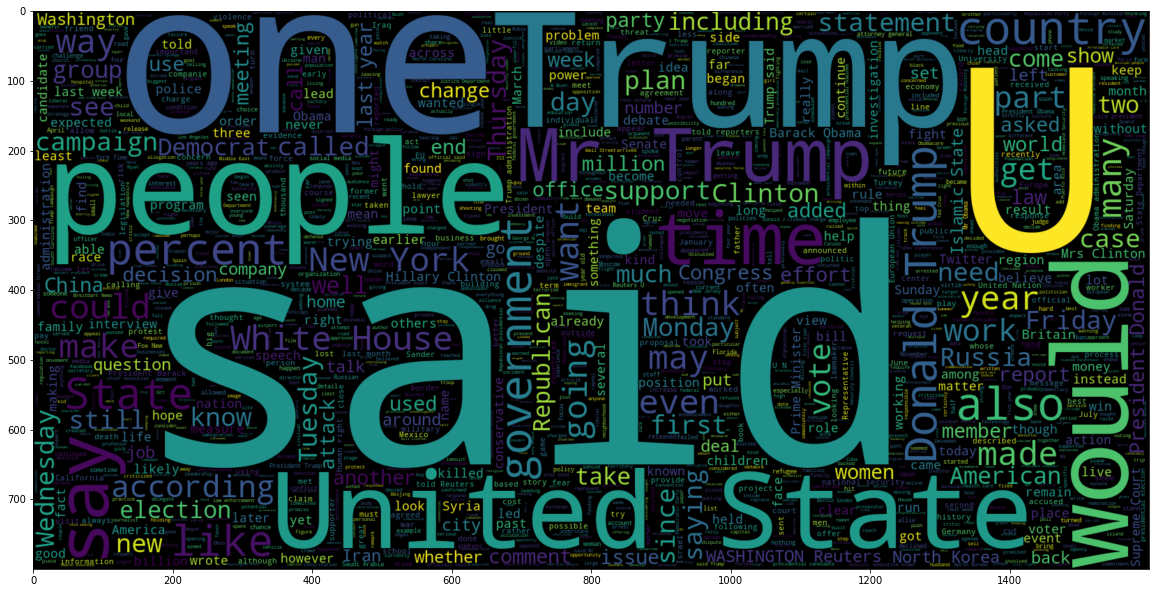

In [ ]:
#Creating a word cloud for the text that is fake using the uncleaned data
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 0].text))
plt.imshow(wc, interpolation = 'bilinear')

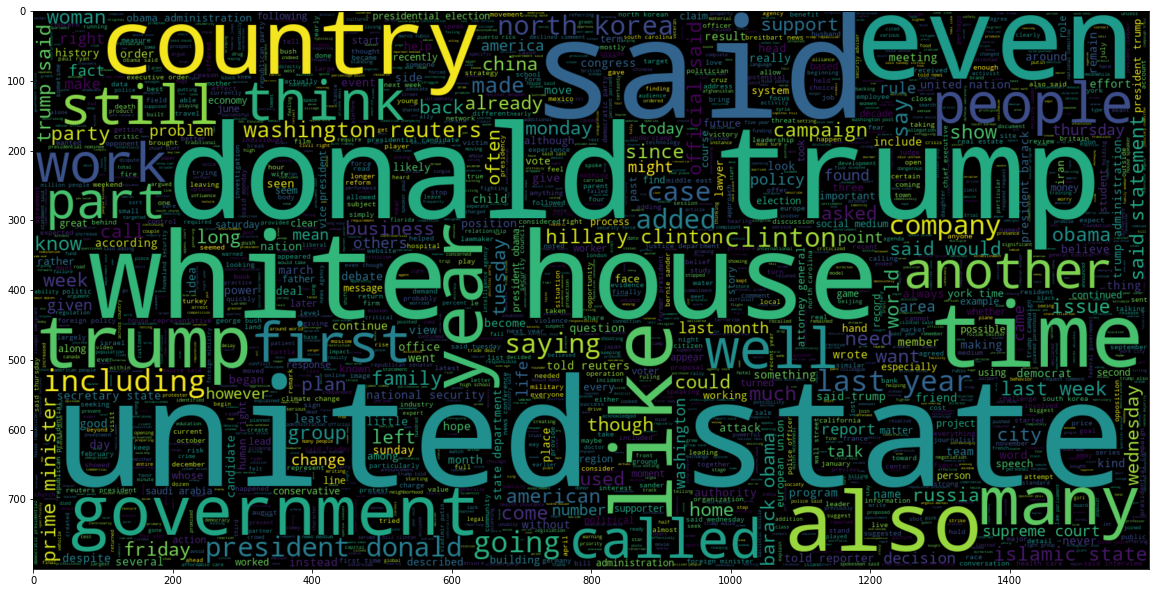

In [ ]:
#Creating a word cloud for the text that is fake using the cleaned data
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 0].clean))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [ ]:
# Ngram analysis for the top 10 bigrams:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

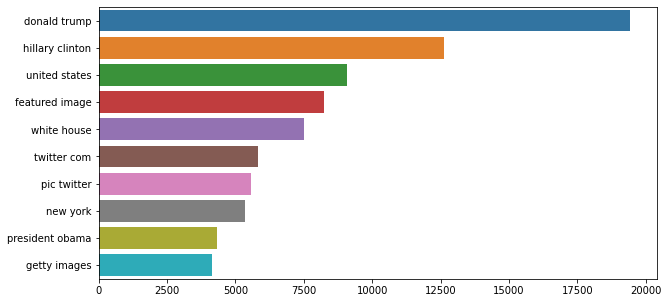

In [ ]:
# Plotting the graph forthe top 10 bigrams in the real news
plt.figure(figsize=(10,5))
fake_df = df[df['label']==1]
top_tweet_bigrams=get_top_tweet_bigrams(fake_df['clean_joined'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

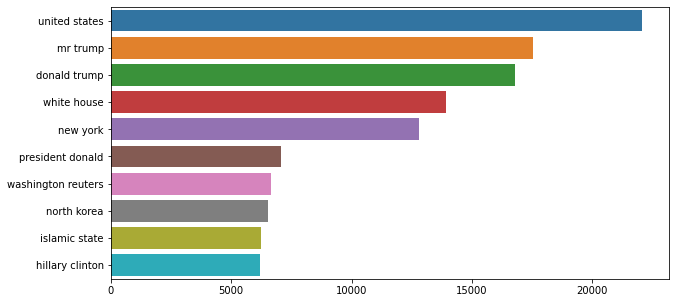

In [ ]:
#Plotting graph for the top 10 bigrams in the fake news
plt.figure(figsize=(10,5))
true_df = df[df['label']==0]
top_tweet_bigrams=get_top_tweet_bigrams(true_df['clean_joined'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Displaying the top 50 words in the real and fake titles along with the aprroximate number of occurences
stop_words = stopwords.words('english')
trueTitles = list(df[df['label'] == 1].title)
trueTokens = [sent.lower().split() for sent in trueTitles]
trueWordCount = {}
for senteceTokens in trueTokens:
  for token in senteceTokens:
    if token in stop_words:
      continue
    if token in trueWordCount:
      trueWordCount[token] = trueWordCount[token] + 1
    else:
      trueWordCount[token] = 1
trueWordCount = {k: v for k, v in sorted(trueWordCount.items(), key=lambda item: item[1],reverse=True)}

falseTitles = list(df[df['label'] == 0].title)
falseTokens = [sent.lower().split() for sent in falseTitles]
falseWordCount = {}
for senteceTokens in falseTokens:
  for token in senteceTokens:
    if token in stop_words:
      continue
    if token in falseWordCount:
      falseWordCount[token] = falseWordCount[token] + 1
    else:
      falseWordCount[token] = 1
falseWordCount = {k: v for k, v in sorted(falseWordCount.items(), key=lambda item: item[1],reverse=True)}

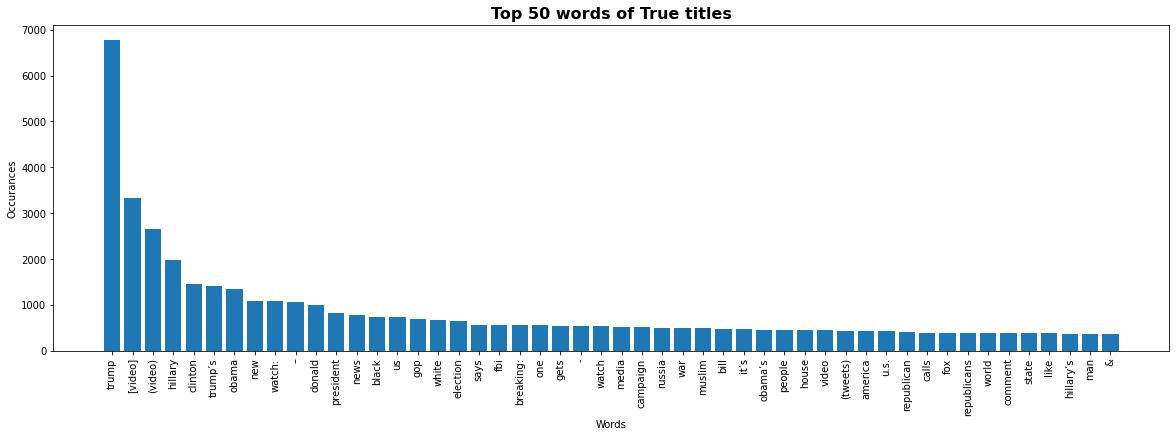

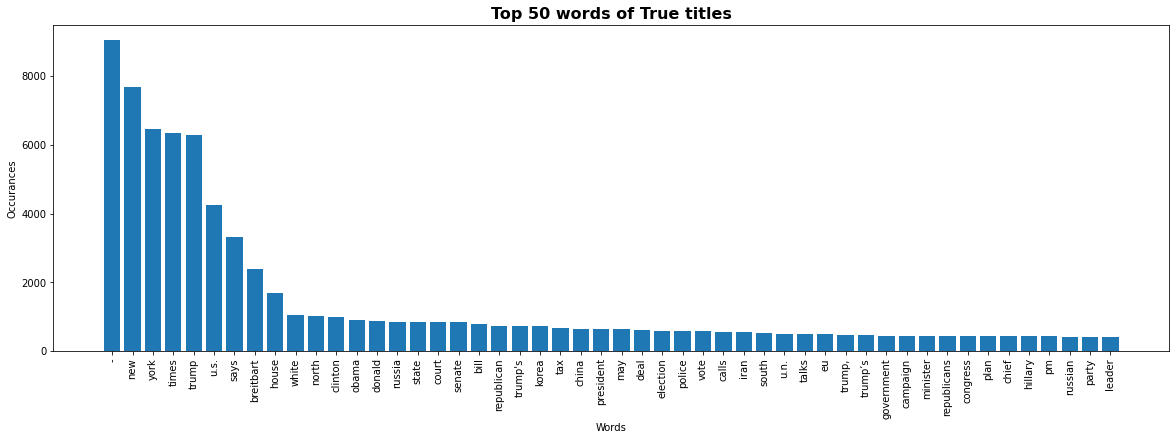

In [ ]:
import itertools 

def plot_top_words(wordDict,true_false):
  top20 = dict(itertools.islice(wordDict.items(), 50))
  plt.figure(figsize=(20, 6))
  plt.bar(range(len(top20)), top20.values(), align='center')
  plt.xticks(range(len(top20)), top20.keys())
  plt.xticks(rotation = 90)
  tile = 'Top 50 words of '+true_false+' titles'
  plt.title(tile,fontsize = 16, fontweight="bold")
  plt.ylabel('Occurances');
  plt.xlabel('Words');
  plt.show()

plot_top_words(trueWordCount,'True')
plot_top_words(falseWordCount,'True')

In [ ]:
import pandas as pd


In [ ]:
x = df['clean']
y = df['label']

In [ ]:
x


0        comment expected barack obama member fyf911 fu...
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        rs28 sarmat missile dubbed satan replace ss18 ...
5        time someone sued southern poverty centeron tu...
                               ...                        
72127    email released wikileaks sunday appears show f...
72129    washington reuters hacker believed working rus...
72130    know fantasyland republican never questioned c...
72131    migrant refuse leave train refugee camp hungar...
72132    mexico city reuters donald trump’s combative s...
Name: clean, Length: 63121, dtype: object

In [ ]:
y

0        1
2        1
3        0
4        1
5        1
        ..
72127    1
72129    0
72130    1
72131    0
72132    0
Name: label, Length: 63121, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train

49944    north carolina republican fan beatles disappoi...
58521    rush cruz sign desperation given failure senat...
7267     seems colin kaepernick become influence youth ...
67476    gun pointed slept shipping container walked pa...
22499    21st century wire say weekly documentary film ...
                               ...                        
50460    good morning here’s need know turkish authorit...
58425    hard believe carson brain surgeon word come mo...
46532    washington reuters british primatologist jane ...
47681    donald trump twoweekold campaign pretty good s...
2767     image democratic party activist gunman james h...
Name: clean, Length: 44184, dtype: object

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=0)

In [ ]:
x_train.shape

(30928,)

In [ ]:
y_train.shape

(30928,)

In [ ]:
x_val.shape

(13256,)

In [ ]:
y_val.shape

(13256,)

In [ ]:
x_val

4411     government spends billion year fight global wa...
39823    tune alternate current radio network another l...
7161     host racist white nationalist radio show given...
63135    harare reuters zimbabwe former vice president ...
31921    iraqi city karbala holy shrine third shia imam...
                               ...                        
61401    obama administration’s directive last week ins...
1038     reuters billionaire investor warren buffett de...
69275    ottawa reuters prime minister justin trudeau t...
2979     considerable anticipation seemed much awaited ...
47162    jersey chris christie roared sunday fierce deb...
Name: clean, Length: 13256, dtype: object

In [ ]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train.fillna(' '))
tfid_x_val = tfvect.transform(x_val.fillna(' '))
tfid_x_test = tfvect.transform(x_test.fillna(' '))

In [ ]:
tfid_x_val.shape

(13256, 221216)

In [ ]:
tfid_x_train.shape

(30928, 221216)

**Without** **Hyper-Parameters**

In [ ]:
# Multinominal Naive Bayes
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
classifier = MultinomialNB()
classifier.fit(tfid_x_train,y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(tfid_x_val)

score = accuracy_score(y_val,y_pred)

con_mat = confusion_matrix(y_val,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 78.2%


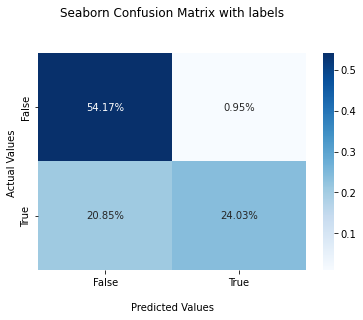

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

#Confusion Matrix.
plt.show()

In [ ]:
y_pred = classifier.predict(tfid_x_test)

score = accuracy_score(y_test,y_pred)

con_mat = confusion_matrix(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 77.68%


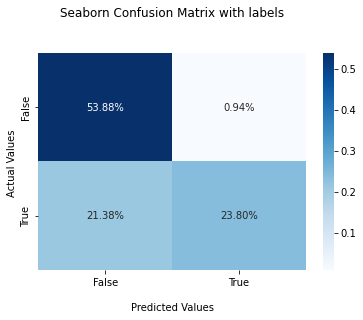

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display  Confusion Matrix.
plt.show()

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rando = RandomForestClassifier()
Rando.fit(tfid_x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred1 = Rando.predict(tfid_x_val)
RFscore = accuracy_score(y_val,y_pred1)

con_mat = confusion_matrix(y_val,y_pred1)
print(f'Accuracy: {round(RFscore*100,2)}%')

Accuracy: 89.45%


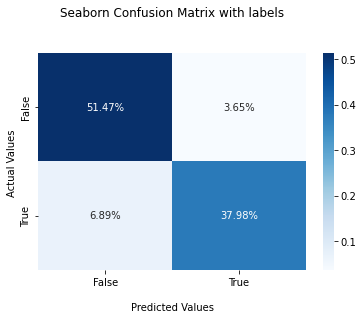

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
y_pred1 = Rando.predict(tfid_x_test)
RFscore = accuracy_score(y_test,y_pred1)

con_mat = confusion_matrix(y_test,y_pred1)
print(f'Accuracy: {round(RFscore*100,2)}%')

Accuracy: 89.21%


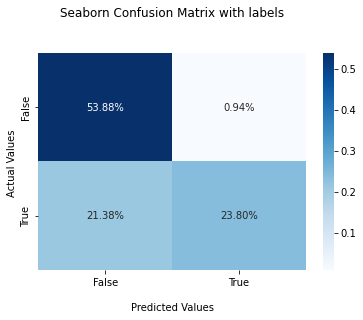

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket label
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display  Confusion Matrix.
plt.show()

In [ ]:
# SGD classifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD_model = SGD.fit(tfid_x_train, y_train)

In [ ]:
sgd_predict = SGD_model.predict(tfid_x_val)
sgd_accuracy = accuracy_score(y_val, sgd_predict)

con_mat = confusion_matrix(y_val,sgd_predict)
print(f'Accuracy: {round(sgd_accuracy*100,2)}%')


Accuracy: 93.87%


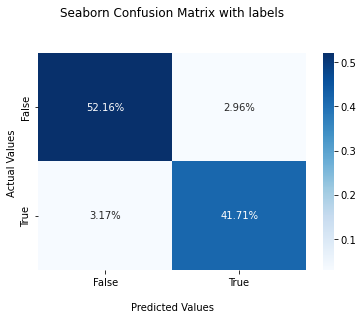

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
sgd_predict = SGD_model.predict(tfid_x_test)
sgd_accuracy = accuracy_score(y_test, sgd_predict)

con_mat = confusion_matrix(y_test,sgd_predict)
print(f"accuracy:  {round(sgd_accuracy*100,2)}%" )

accuracy:  93.58%


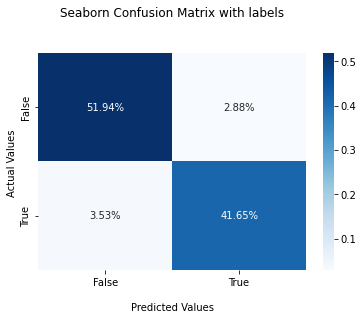

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display  Confusion Matrix.
plt.show()

**RandomSearchCV**

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = MultinomialNB()
param_grid={
                 'alpha':  randint(0,1),
                 }

rs=RandomizedSearchCV(model, param_grid, n_iter = 50, random_state=42)

rs.fit(tfid_x_train, y_train)

print('===========================')
print("Best MSE = {:.3f} , when params {}".format(rs.best_score_, rs.best_params_))
print('===========================')

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

a

Best MSE = 0.884 , when params {'alpha': 0}
CPU times: user 16.7 s, sys: 323 ms, total: 17.1 s
Wall time: 16.8 s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



In [ ]:
# naive bayes with parameters
classifier = MultinomialNB(alpha = 0)
classifier.fit(tfid_x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



MultinomialNB(alpha=0)

In [ ]:
y_pred = classifier.predict(tfid_x_val)

score = accuracy_score(y_val,y_pred)

con_mat = confusion_matrix(y_val,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 88.77%


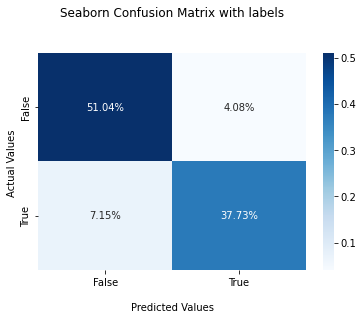

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display Confusion Matrix.
plt.show()

In [ ]:
y_pred = classifier.predict(tfid_x_test)

score = accuracy_score(y_test,y_pred)

con_mat = confusion_matrix(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 88.91%


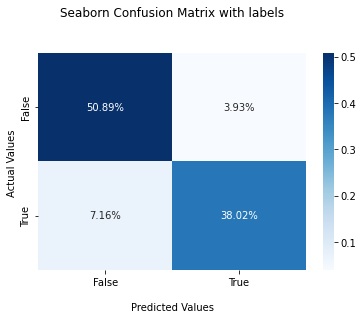

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display Confusion Matrix.
plt.show()

In [ ]:
# Random forest with parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = RandomForestClassifier()
param_grid={
              'max_depth': [10, 20, 30, 40, 50, 60, None],
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [200, 400, 600, 800]
                 }

rs=RandomizedSearchCV(model, param_grid, random_state=42)

rs.fit(tfid_x_train, y_train)

print('===========================')
print("Best MSE = {:.3f} , when params {}".format(rs.best_score_, rs.best_params_))
print('===========================')

Best MSE = 0.895 , when params {'n_estimators': 600, 'max_features': 'auto', 'max_depth': None}


In [ ]:
Rando = RandomForestClassifier(n_estimators=600, max_features='auto', max_depth = None)
Rando.fit(tfid_x_train,y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
y_pred1 = Rando.predict(tfid_x_val)
RFscore = accuracy_score(y_val,y_pred1)

con_mat = confusion_matrix(y_val,y_pred1)
print(f'Accuracy: {round(RFscore*100,2)}%')

Accuracy: 90.17%


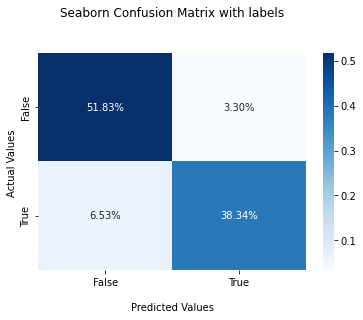

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display  Confusion Matrix.
plt.show()

In [ ]:
y_pred1 = Rando.predict(tfid_x_test)
RFscore = accuracy_score(y_test,y_pred1)

con_mat = confusion_matrix(y_test,y_pred1)
print(f'Accuracy: {round(RFscore*100,2)}%')

Accuracy: 89.74%


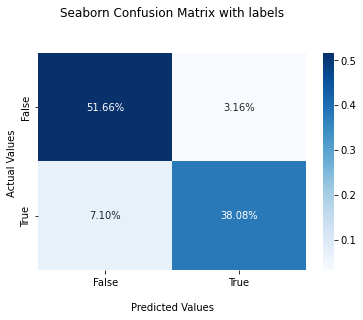

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display Confusion Matrix.
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
param_grid={
               'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
               'penalty':['l1', 'l2', 'elasticnet'],
             'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
             'class_weight':  [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
             'eta0': [1, 10, 100],
                 }

rs=RandomizedSearchCV(model, param_grid, random_state=42)

rs.fit(tfid_x_train, y_train)


print('===========================')
print("Best MSE = {:.3f} , when params {}".format(rs.best_score_, rs.best_params_))
print('===========================')

Best MSE = 0.921 , when params {'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'adaptive', 'eta0': 10, 'class_weight': {1: 0.6, 0: 0.4}, 'alpha': 0.0001}


In [ ]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(penalty='l2', loss='hinge', learning_rate='adaptive',eta0=10, alpha=0.0001  )
SGD_model = SGD.fit(tfid_x_train, y_train)

In [ ]:
sgd_predict = SGD_model.predict(tfid_x_val)
sgd_accuracy = accuracy_score(y_val, sgd_predict)

con_mat = confusion_matrix(y_val,sgd_predict)
print(f'Accuracy: {round(sgd_accuracy*100,2)}%')

Accuracy: 93.87%


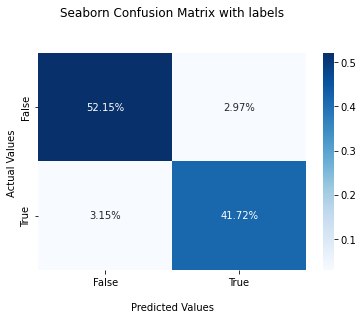

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display Confusion Matrix.
plt.show()

In [ ]:
sgd_predict = SGD_model.predict(tfid_x_test)
sgd_accuracy = accuracy_score(y_test, sgd_predict)

con_mat = confusion_matrix(y_test,sgd_predict)
print(f"accuracy:  {round(sgd_accuracy*100,2)}%" )

accuracy:  93.61%


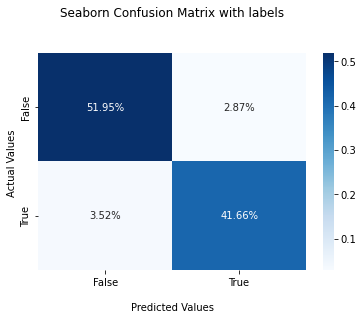

In [ ]:
import seaborn as sns

ax = sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display Confusion Matrix.
plt.show()